# Weather Go SEOUL


<big>**Weather Go <small>SEOUL</small>**</big>은 인공지능을 통해 날씨에 따라 관광지의 관광객 수를 예측하고, 관광소비자에게 관광지를 추천해주는 서비스입니다.

- 기대효과

 관광소비자에게 어디를 가면 좋을지를 추천해줌으로써 날씨에 따른 관광지 선택에 있어서 검색에 대한 불편함을 덜어줄 것으로 기대됩니다.

EDA&MODEL_Helper(윤요섭).ipynb
--

https://colab.research.google.com/drive/1CO3POctS2c_HUT8hsPgLVz3siS95dREW?usp=sharing


# EDA

데이터 가공(최적 칼럼 선택이 완료된 관광지별 csv를 불러옵니다.

전처리 과정 안 끝난 초기 버전
--

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [15]:
import warnings
warnings.filterwarnings('ignore')

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
!pip install catboost

In [2]:
# 처음에 만든 14개의 데이터 프레임
b_GyeongBokGung=pd.read_csv('/content/drive/MyDrive/경복궁.csv')
b_NationalMuseumOfKorea=pd.read_csv('/content/drive/MyDrive/국립중앙박물관.csv')
b_NamSanGolHanOkVillage=pd.read_csv('/content/drive/MyDrive/남산골한옥마을.csv')
b_DuckSooGung=pd.read_csv('/content/drive/MyDrive/덕수궁.csv')
b_SeoDaeMunNaturalHistoryMuseum=pd.read_csv('/content/drive/MyDrive/서대문자연사박물관.csv')
b_SeoDaeMunPrisonHistoryMuseum=pd.read_csv('/content/drive/MyDrive/서대문형무소역사관.csv')
b_SeoulMuseumOfArt=pd.read_csv('/content/drive/MyDrive/서울시립미술관.csv')
b_SunReungJungReung=pd.read_csv('/content/drive/MyDrive/선릉정릉.csv')
b_JongMyo=pd.read_csv('/content/drive/MyDrive/종묘.csv')
b_ChangGyeongGung=pd.read_csv('/content/drive/MyDrive/창경궁.csv')
b_ChangDeokGung=pd.read_csv('/content/drive/MyDrive/창덕궁.csv')
b_TaeReungGangNeung=pd.read_csv('/content/drive/MyDrive/태릉강릉조선왕릉전시관.csv')
b_TrickEyeMuseum=pd.read_csv('/content/drive/MyDrive/트릭아이미술관.csv')
b_HeonLeungInReung=pd.read_csv('/content/drive/MyDrive/헌릉인릉.csv')

- 이건 일방적으로 제 Drive에서 받아온거라 path는 수정하시면 됩니다.

In [5]:
b_GyeongBokGung=b_GyeongBokGung.iloc[:, 1:]
b_NationalMuseumOfKorea=b_NationalMuseumOfKorea.iloc[:, 1:]
b_NamSanGolHanOkVillage=b_NamSanGolHanOkVillage.iloc[:, 1:]
b_DuckSooGung=b_DuckSooGung.iloc[:, 1:]
b_SeoDaeMunNaturalHistoryMuseum=b_SeoDaeMunNaturalHistoryMuseum.iloc[:, 1:]
b_SeoDaeMunPrisonHistoryMuseum=b_SeoDaeMunPrisonHistoryMuseum.iloc[:, 1:]
b_SeoulMuseumOfArt=b_SeoulMuseumOfArt.iloc[:, 1:]
b_SunReungJungReung=b_SunReungJungReung.iloc[:, 1:]
b_JongMyo=b_JongMyo.iloc[:, 1:]
b_ChangGyeongGung=b_ChangGyeongGung.iloc[:, 1:]
b_ChangDeokGung=b_ChangDeokGung.iloc[:, 1:]
b_TaeReungGangNeung=b_TaeReungGangNeung.iloc[:, 1:]
b_TrickEyeMuseum=b_TrickEyeMuseum.iloc[:, 1:]
b_HeonLeungInReung=b_HeonLeungInReung.iloc[:, 1:]

In [8]:
# EDA를 위한 class 작성  (feature engineering, statsmodels)

class EDA :
  
  def __init__(self, data = None):
    self.data = data

  # 최고기온, 평균기온 25%, 50%, 75% 기준으로 binning  
  def binning_tp(self) :
    df = self.data
    df.loc[df['최고 기온(°C)'] <= df['최고 기온(°C)'].quantile(0.25), 'tp_1'] = 0
    df.loc[(df['최고 기온(°C)'] > df['최고 기온(°C)'].quantile(0.25)) & (df['최고 기온(°C)'] <= df['최고 기온(°C)'].quantile(0.5)), 'tp_1'] = 1
    df.loc[(df['최고 기온(°C)'] > df['최고 기온(°C)'].quantile(0.5)) & (df['최고 기온(°C)'] <= df['최고 기온(°C)'].quantile(0.75)), 'tp_1'] = 2
    df.loc[df['최고 기온(°C)'] > df['최고 기온(°C)'].quantile(0.75), 'tp_1'] = 3
    
    df.loc[df['평균 기온(°C)'] <= df['평균 기온(°C)'].quantile(0.25), 'tp_2'] = 0
    df.loc[(df['평균 기온(°C)'] > df['평균 기온(°C)'].quantile(0.25)) & (df['평균 기온(°C)'] <= df['평균 기온(°C)'].quantile(0.5)), 'tp_2'] = 1
    df.loc[(df['평균 기온(°C)'] > df['평균 기온(°C)'].quantile(0.5)) & (df['평균 기온(°C)'] <= df['평균 기온(°C)'].quantile(0.75)), 'tp_2'] = 2
    df.loc[df['평균 기온(°C)'] > df['평균 기온(°C)'].quantile(0.75), 'tp_2'] = 3

    return df

  # binning한 최고온도, 평균온도 더미화
  def dummies(self) :
    df = EDA(self.data).binning_tp()

    # 최고온도 더미화
    df_tp_1 = pd.get_dummies(df['tp_1'])
    df = pd.concat([df, df_tp_1], axis = 1)
    df = df.rename(columns = {0 : 'tp_1_0', 1 : 'tp_1_1', 2 : 'tp_1_2', 3 : 'tp_1_3'})
    df = df.drop('tp_1', axis= 1)
    
    #평균온도 더미화
    df_tp_2 = pd.get_dummies(df['tp_2'])
    df = pd.concat([df, df_tp_2], axis = 1)
    df = df.rename(columns = {0 : 'tp_2_0', 1 : 'tp_2_1', 2 : 'tp_2_2', 3 : 'tp_2_3'})
    df = df.drop('tp_2', axis= 1)
    
    return df

  # season데이터 추가(3,4,5 : 봄, 6,7,8 : 여름, 9,10,11 : 가을, 12,1,2 : 겨울)
  def add_season(self, change_featurename = '타겟이름') :
    df = self.data.rename(columns = {change_featurename : 'target'})
    df.loc[(df['month'] == 12 )|(df['month'] == 1 )|(df['month'] == 2 ), 'season'] = 4
    df.loc[(df['month'] == 3 )|(df['month'] == 4 )|(df['month'] == 5 ), 'season'] = 1
    df.loc[(df['month'] == 6 )|(df['month'] == 7 )|(df['month'] == 8 ), 'season'] = 2
    df.loc[(df['month'] == 9 )|(df['month'] == 10 )|(df['month'] == 11 ), 'season'] = 3
    return df

  # 분포확인은 따로 함수를 만듦
  # def weather_dist(self) : # 날씨 분포
  #   for i in self.data.columns[2:-1] :
  #     fig, ax = plt.subplots(figsize = (10, 5))
  #     sns.distplot(self.data[i])
  #     plt.rc('font', family='NanumGothic') 
  #     plt.title(f'{i}에 대한 분포')
  

  def make_season_data(self) : # 계절 binning 후 계절별 dataframe 만들기
    

    spring = self.data.loc[(self.data['season'] == 1)].drop(['month', 'season'], axis = 1)
    summer = self.data.loc[(self.data['season'] == 2)].drop(['month', 'season'], axis = 1)
    fall = self.data.loc[(self.data['season'] == 3)].drop(['month', 'season'], axis = 1)
    winter = self.data.loc[(self.data['season'] == 4)].drop(['month', 'season'], axis = 1)
    return spring, summer, fall, winter
  
  # 분포확인은 따로 함수를 만듦
  # def season_dist(self,remove_feature = '관광지이름') :
  #   df = self.data.drop(remove_feature, axis = 1)
  #   for i in df.columns[2:-1] :
  #     fig, ax = plt.subplots(figsize = (10, 5))
  #     sns.distplot(self.data[i])
  #     plt.rc('font', family='NanumGothic') 
  #     plt.title(f'{i}에 대한 분포')
  
  # statsmodel 확인
  def check_statsmodels(self) :
    df = self.data
    X = df.drop(['date', 'target'], axis =1)
    y = df['target']
    X_constant = sm.add_constant(X)
    model = sm.OLS(y, X_constant)
    lin_reg = model.fit()
    print(lin_reg.summary())

In [10]:
# 분포확인을 위한 함수
def check_distribution(data, column_list) :
  for i in column_list :
    fig, ax = plt.subplots(figsize = (10,5))
    sns.distplot(data[i])
    plt.rc('font', family='NanumGothic') 
    plt.title(f'{i}에 대한 분포')

In [ ]:
# 그림그릴때 한글 폰트 깨짐 방지

!apt-get update -qq
!apt-get install fonts-nanum* -qq
import matplotlib.font_manager as fm
for fontInfo in fm.fontManager.ttflist :
  if 'Nanum' in fontInfo.name :
    print(fontInfo.name+ " = " + fontInfo.fname)

In [12]:
import matplotlib.font_manager as fm
fm._rebuild()

전처리 과정 끝난 버전
--

In [4]:
seoul=pd.read_csv('/content/drive/MyDrive/웨더고프로젝트/ver1(210717)/seoul.csv')
GyeongBokGung=pd.read_csv('/content/drive/MyDrive/웨더고프로젝트/ver1(210717)/GyeongBokGung.csv')
NationalMuseumOfKorea=pd.read_csv('/content/drive/MyDrive/웨더고프로젝트/ver1(210717)/NationalMuseumOfKorea.csv')
NamSanGolHanOkVillage=pd.read_csv('/content/drive/MyDrive/웨더고프로젝트/ver1(210717)/NamSanGolHanOkVillage.csv')
DuckSooGung=pd.read_csv('/content/drive/MyDrive/웨더고프로젝트/ver1(210717)/DuckSooGung.csv')
SeoDaeMunNaturalHistoryMuseum=pd.read_csv('/content/drive/MyDrive/웨더고프로젝트/ver1(210717)/SeoDaeMunNaturalHistoryMuseum.csv')
SeoDaeMunPrisonHistoryMuseum=pd.read_csv('/content/drive/MyDrive/웨더고프로젝트/ver1(210717)/SeoDaeMunPrisonHistoryMuseum.csv')
SeoulMuseumOfArt=pd.read_csv('/content/drive/MyDrive/웨더고프로젝트/ver1(210717)/SeoulMuseumOfArt.csv')
SunReungJungReung=pd.read_csv('/content/drive/MyDrive/웨더고프로젝트/ver1(210717)/SunReungJungReung.csv')
JongMyo=pd.read_csv('/content/drive/MyDrive/웨더고프로젝트/ver1(210717)/JongMyo.csv')
ChangGyeongGung=pd.read_csv('/content/drive/MyDrive/웨더고프로젝트/ver1(210717)/ChangGyeongGung.csv')
ChangDeokGung=pd.read_csv('/content/drive/MyDrive/웨더고프로젝트/ver1(210717)/ChangDeokGung.csv')
TaeReungGangNeung=pd.read_csv('/content/drive/MyDrive/웨더고프로젝트/ver1(210717)/TaeReungGangNeung.csv')
TrickEyeMuseum=pd.read_csv('/content/drive/MyDrive/웨더고프로젝트/ver1(210717)/TrickEyeMuseum.csv')
HeonLeungInReung=pd.read_csv('/content/drive/MyDrive/웨더고프로젝트/ver1(210717)/HeonLeungInReung.csv')

# 덕수궁

In [6]:
b_DuckSooGung.columns

Index(['date', 'month', '최고 기온(°C)', '최소 상대습도(%)', '평균 기온(°C)', '평균 상대습도(%)',
       '일강수량(mm)', '평균 풍속(m/s)', '합계 일조 시간(hr)', '0.5m 지중온도(°C)', '최대 풍속(m/s)',
       '합계 일사량(MJ/m2)', '덕수궁'],
      dtype='object')

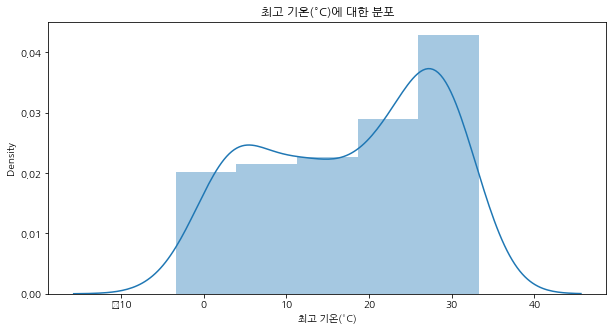

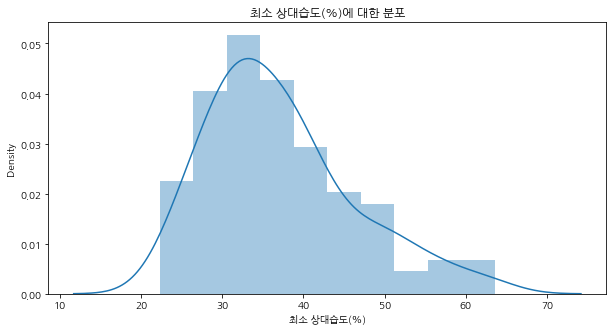

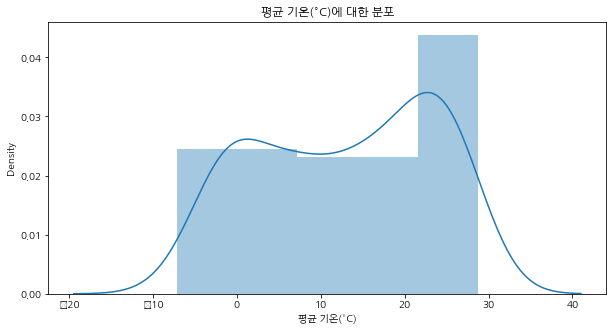

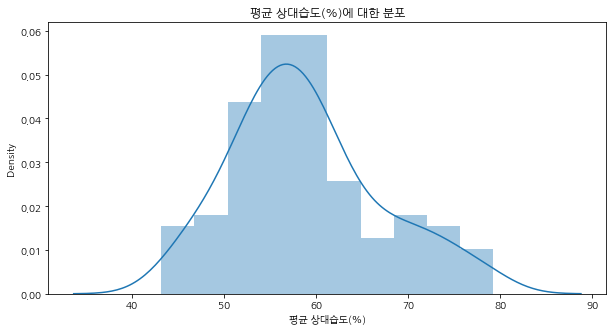

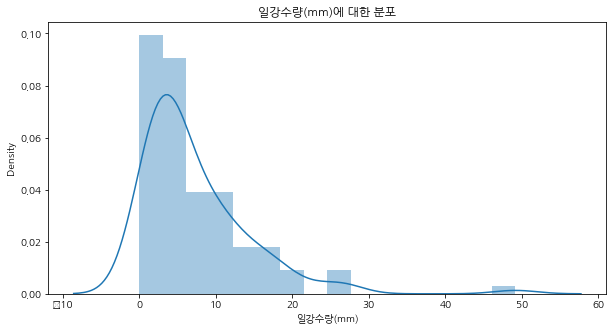

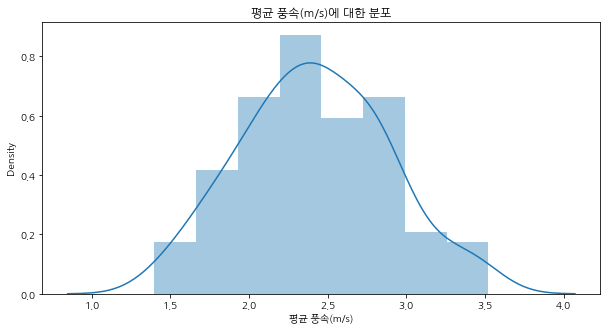

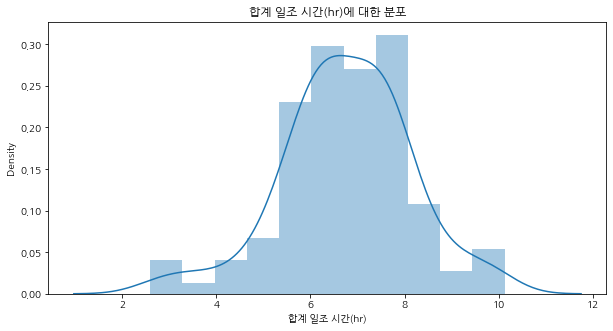

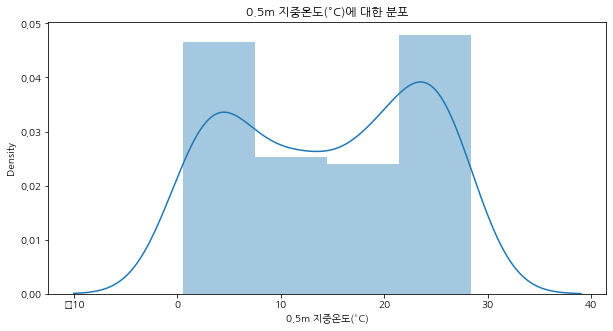

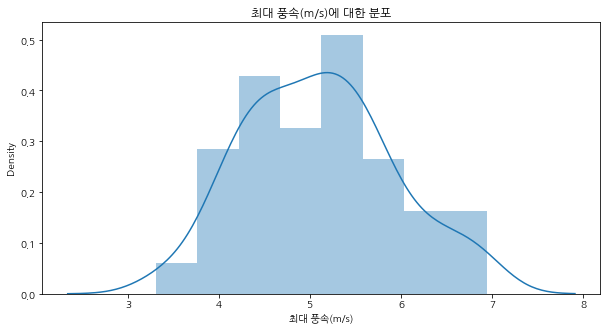

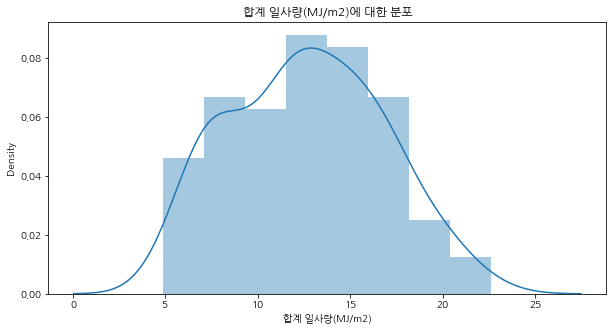

In [16]:
# 덕수궁 날씨데이터 분포 확인
check_distribution(b_DuckSooGung, ['최고 기온(°C)', '최소 상대습도(%)', '평균 기온(°C)', '평균 상대습도(%)',
       '일강수량(mm)', '평균 풍속(m/s)', '합계 일조 시간(hr)', '0.5m 지중온도(°C)', '최대 풍속(m/s)',
       '합계 일사량(MJ/m2)'])

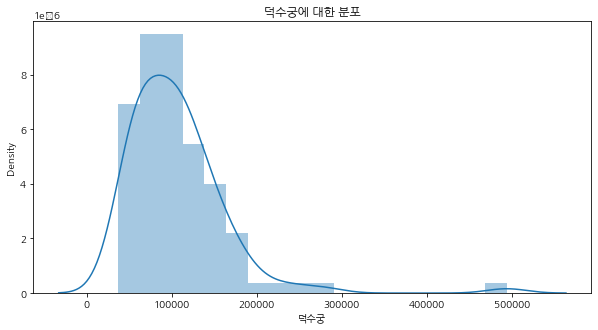

In [17]:
# 덕수궁 타겟 분포 확인
check_distribution(b_DuckSooGung,['덕수궁'])

In [18]:
# 덕수궁 데이터에 계절데이터 추가
df = EDA(b_DuckSooGung).add_season('덕수궁')
df

,date,month,최고 기온(°C),최소 상대습도(%),평균 기온(°C),평균 상대습도(%),일강수량(mm),평균 풍속(m/s),합계 일조 시간(hr),0.5m 지중온도(°C),최대 풍속(m/s),합계 일사량(MJ/m2),target,season
0,201101,1,-3.406452,35.129032,-7.183871,53.829032,1.112500,2.796774,7.048387,1.541935,5.593548,9.951290,92135,4.0
1,201102,2,5.864286,32.000000,1.221429,55.228571,9.700000,2.553571,5.950000,1.025000,5.239286,10.827857,132920,4.0
2,201103,3,8.345161,25.258065,3.616129,51.112903,2.085714,3.406452,7.748387,5.158065,6.877419,16.342258,64869,1.0
3,201104,4,15.596667,28.666667,10.720000,54.240000,10.009091,3.243333,6.736667,10.736667,6.650000,16.832333,85548,1.0
4,201105,5,22.983871,32.161290,17.925806,56.416129,4.107692,2.832258,5.819355,16.303226,6.235484,17.091935,103100,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,201908,8,31.635484,44.645161,27.190323,68.516129,12.700000,1.590323,7.976667,26.841935,3.819355,16.766897,149905,2.0
104,201909,9,27.100000,44.133333,22.643333,65.270000,10.753846,2.183333,5.630000,24.080000,4.253333,12.892667,181790,3.0
105,201910,10,21.767742,38.935484,16.370968,62.164516,7.928571,2.129032,7.629032,19.666667,4.412903,12.755806,280107,3.0
106,201911,11,12.933333,33.133333,7.580000,55.900000,9.850000,2.166667,6.773333,12.273333,4.533333,9.476000,222529,3.0


In [19]:
df = EDA(df).dummies() # 최고기온과 평균기온 binning 후 더미화 해주기

In [20]:
df

,date,month,최고 기온(°C),최소 상대습도(%),평균 기온(°C),평균 상대습도(%),일강수량(mm),평균 풍속(m/s),합계 일조 시간(hr),0.5m 지중온도(°C),최대 풍속(m/s),합계 일사량(MJ/m2),target,season,tp_1_0,tp_1_1,tp_1_2,tp_1_3,tp_2_0,tp_2_1,tp_2_2,tp_2_3
0,201101,1,-3.406452,35.129032,-7.183871,53.829032,1.112500,2.796774,7.048387,1.541935,5.593548,9.951290,92135,4.0,1,0,0,0,1,0,0,0
1,201102,2,5.864286,32.000000,1.221429,55.228571,9.700000,2.553571,5.950000,1.025000,5.239286,10.827857,132920,4.0,1,0,0,0,1,0,0,0
2,201103,3,8.345161,25.258065,3.616129,51.112903,2.085714,3.406452,7.748387,5.158065,6.877419,16.342258,64869,1.0,0,1,0,0,0,1,0,0
3,201104,4,15.596667,28.666667,10.720000,54.240000,10.009091,3.243333,6.736667,10.736667,6.650000,16.832333,85548,1.0,0,1,0,0,0,1,0,0
4,201105,5,22.983871,32.161290,17.925806,56.416129,4.107692,2.832258,5.819355,16.303226,6.235484,17.091935,103100,1.0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,201908,8,31.635484,44.645161,27.190323,68.516129,12.700000,1.590323,7.976667,26.841935,3.819355,16.766897,149905,2.0,0,0,0,1,0,0,0,1
104,201909,9,27.100000,44.133333,22.643333,65.270000,10.753846,2.183333,5.630000,24.080000,4.253333,12.892667,181790,3.0,0,0,1,0,0,0,0,1
105,201910,10,21.767742,38.935484,16.370968,62.164516,7.928571,2.129032,7.629032,19.666667,4.412903,12.755806,280107,3.0,0,0,1,0,0,0,1,0
106,201911,11,12.933333,33.133333,7.580000,55.900000,9.850000,2.166667,6.773333,12.273333,4.533333,9.476000,222529,3.0,0,1,0,0,0,1,0,0


In [21]:
봄, 여름, 가을, 겨울 = EDA(df).make_season_data() # 계절별로 데이터 프레임 생성

봄

,date,최고 기온(°C),최소 상대습도(%),평균 기온(°C),평균 상대습도(%),일강수량(mm),평균 풍속(m/s),합계 일조 시간(hr),0.5m 지중온도(°C),최대 풍속(m/s),합계 일사량(MJ/m2),target,tp_1_0,tp_1_1,tp_1_2,tp_1_3,tp_2_0,tp_2_1,tp_2_2,tp_2_3
2,201103,8.345161,25.258065,3.616129,51.112903,2.085714,3.406452,7.748387,5.158065,6.877419,16.342258,64869,0,1,0,0,0,1,0,0
3,201104,15.596667,28.666667,10.720000,54.240000,10.009091,3.243333,6.736667,10.736667,6.650000,16.832333,85548,0,1,0,0,0,1,0,0
4,201105,22.983871,32.161290,17.925806,56.416129,4.107692,2.832258,5.819355,16.303226,6.235484,17.091935,103100,0,0,1,0,0,0,1,0
14,201203,9.522581,28.419355,5.090323,51.845161,3.385714,3.522581,6.187097,5.300000,6.532258,11.855161,40244,0,1,0,0,0,1,0,0
15,201204,17.886667,30.133333,12.340000,54.103333,17.444444,3.423333,7.083333,11.396667,6.940000,14.949333,66246,0,1,0,0,0,1,0,0
16,201205,25.148387,26.838710,19.732258,48.232258,0.820000,2.651613,8.106452,19.266667,5.793548,17.851613,89515,0,0,1,0,0,0,1,0
26,201303,10.835484,25.258065,5.135484,49.174194,3.412500,3.032258,8.267742,5.129032,6.100000,14.300323,77718,0,1,0,0,0,1,0,0
27,201304,14.980000,28.366667,10.006667,53.976667,4.780000,3.426667,7.106667,10.133333,6.920000,14.995333,96402,0,1,0,0,0,1,0,0
28,201305,23.587097,35.870968,18.222581,57.783871,12.000000,2.900000,7.680645,17.283871,5.861290,16.554839,103001,0,0,1,0,0,0,1,0
38,201403,13.058065,33.032258,7.890323,59.835484,0.553846,3.029032,6.925806,7.687097,6.441935,12.646774,144903,0,1,0,0,0,1,0,0


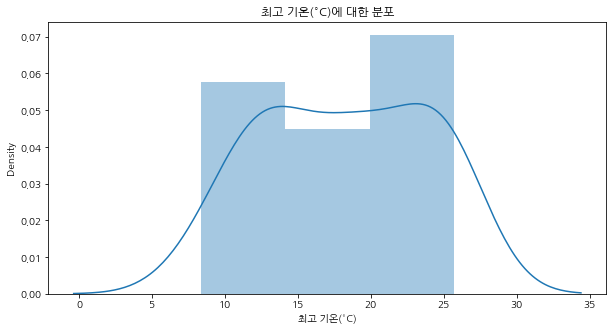

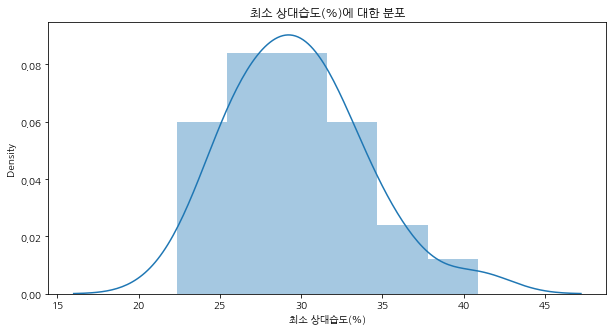

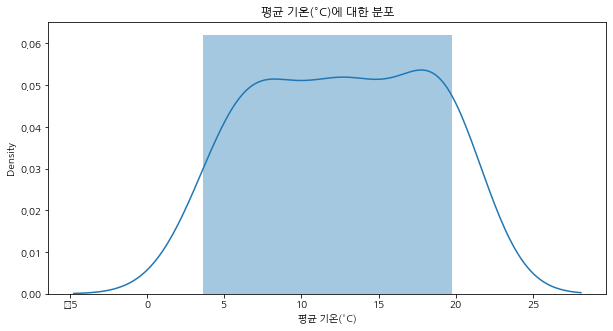

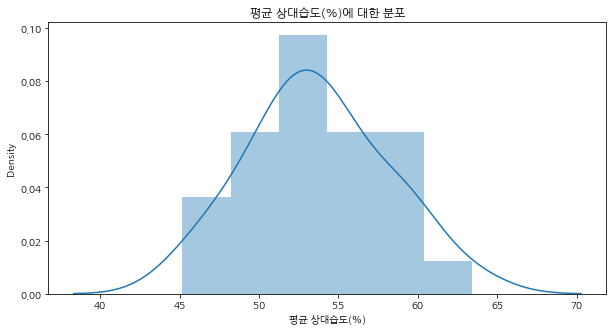

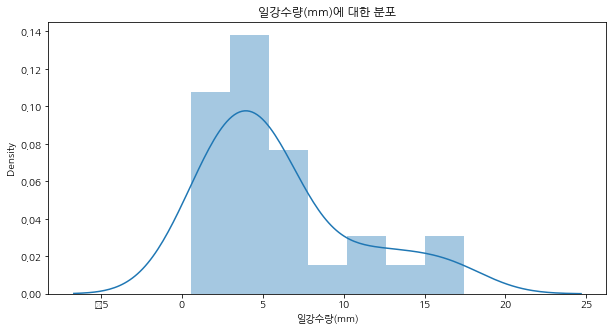

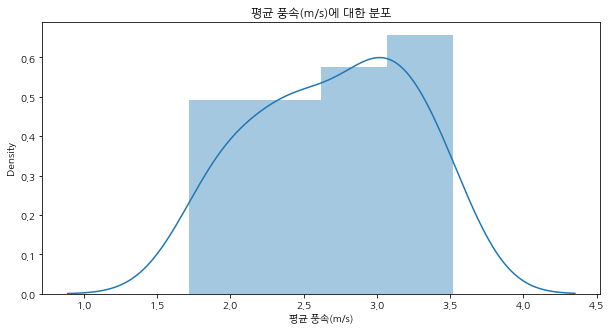

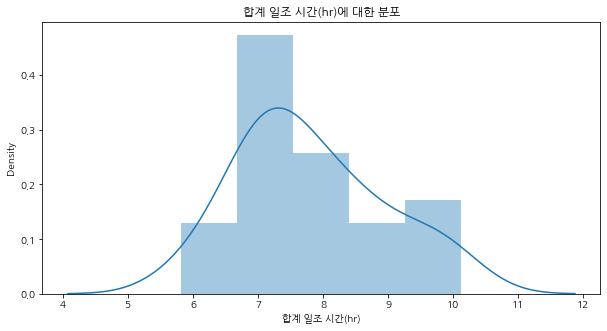

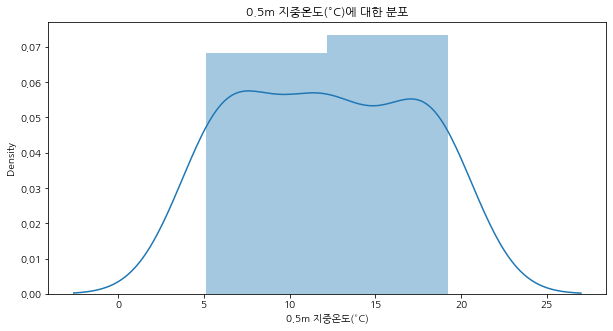

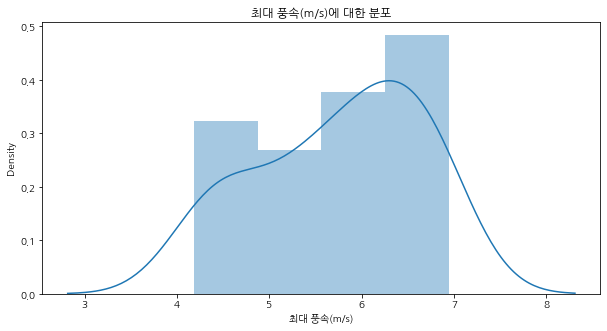

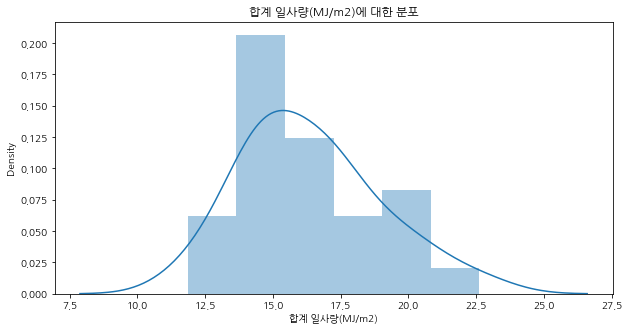

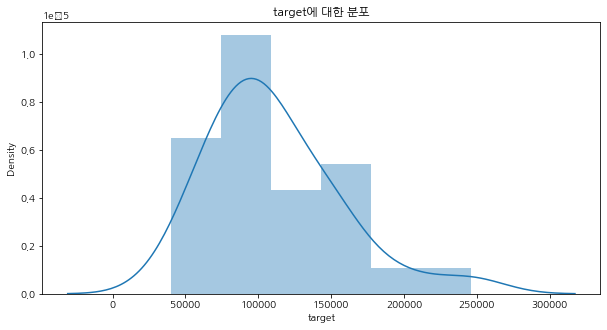

In [22]:
# 덕수궁_봄의 데이터프레임 분포확인
check_distribution(봄,['최고 기온(°C)', '최소 상대습도(%)', '평균 기온(°C)', '평균 상대습도(%)',
       '일강수량(mm)', '평균 풍속(m/s)', '합계 일조 시간(hr)', '0.5m 지중온도(°C)', '최대 풍속(m/s)',
       '합계 일사량(MJ/m2)', 'target'] )

In [25]:
# 덕수궁_봄 의 statsmodels확인
EDA(봄).check_statsmodels()

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.671
Model:                            OLS   Adj. R-squared:                  0.388
Method:                 Least Squares   F-statistic:                     2.376
Date:                Sun, 18 Jul 2021   Prob (F-statistic):             0.0625
Time:                        18:02:34   Log-Likelihood:                -312.55
No. Observations:                  27   AIC:                             651.1
Df Residuals:                      14   BIC:                             667.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          6.171e+04   1.14e+05      0.542

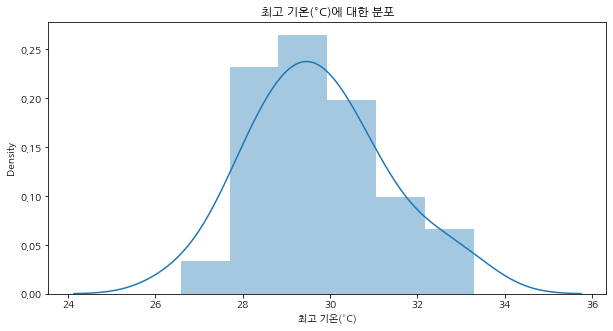

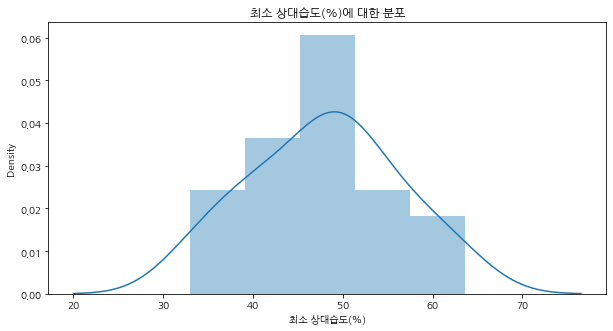

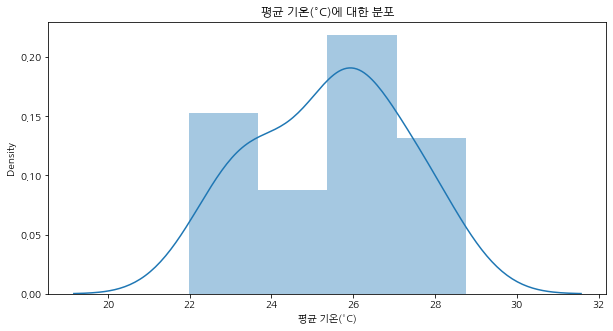

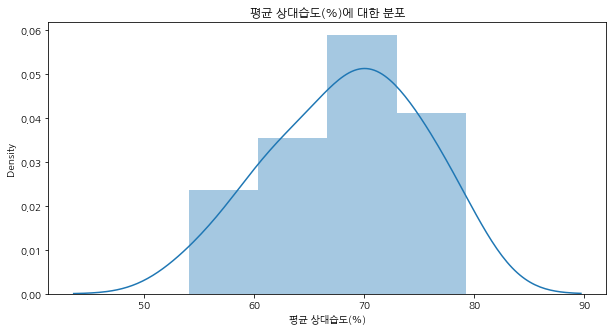

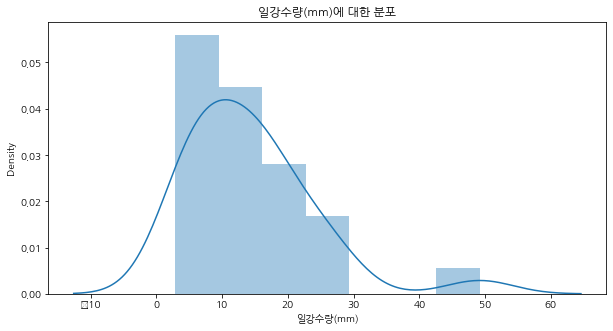

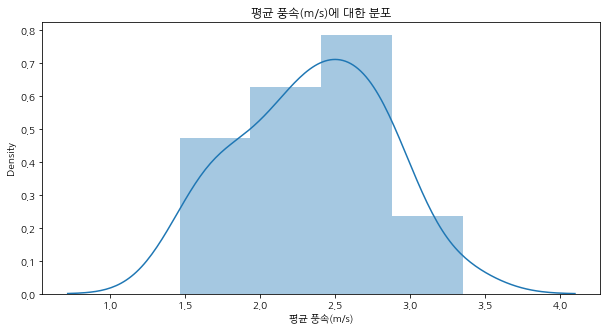

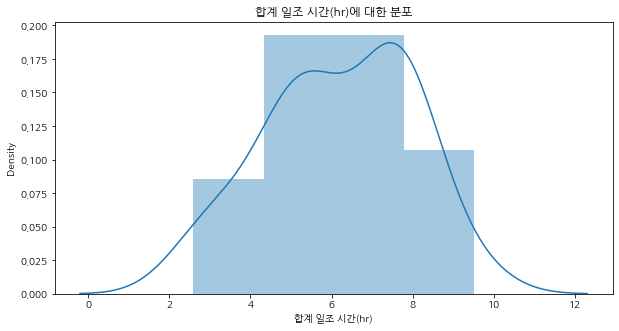

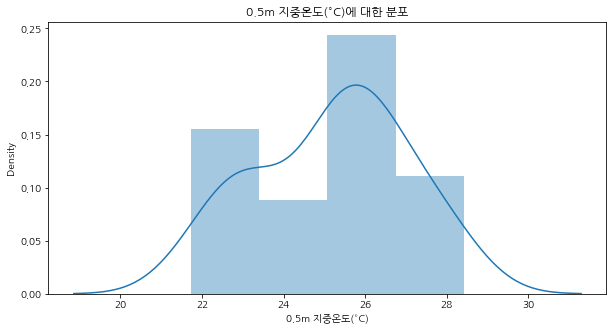

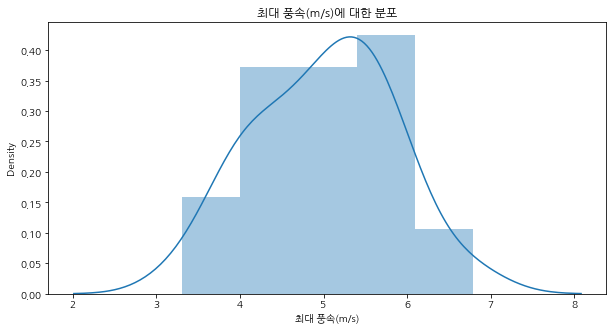

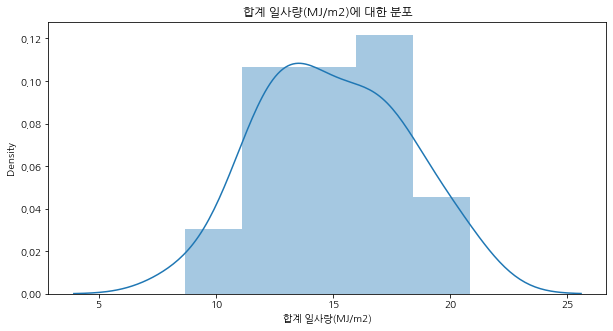

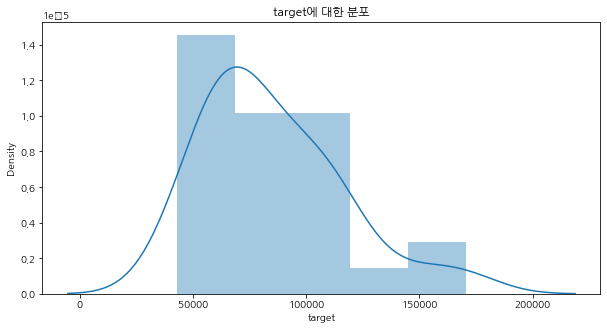

In [26]:
# 덕수궁_여름 의 분포 확인
check_distribution(여름,['최고 기온(°C)', '최소 상대습도(%)', '평균 기온(°C)', '평균 상대습도(%)',
       '일강수량(mm)', '평균 풍속(m/s)', '합계 일조 시간(hr)', '0.5m 지중온도(°C)', '최대 풍속(m/s)',
       '합계 일사량(MJ/m2)', 'target'] )

In [27]:
# 덕수궁_여름의 statsmodels확인
EDA(여름).check_statsmodels()

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.400
Method:                 Least Squares   F-statistic:                     2.576
Date:                Sun, 18 Jul 2021   Prob (F-statistic):             0.0453
Time:                        18:03:09   Log-Likelihood:                -302.82
No. Observations:                  27   AIC:                             629.6
Df Residuals:                      15   BIC:                             645.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          3.377e+05   1.65e+05      2.046

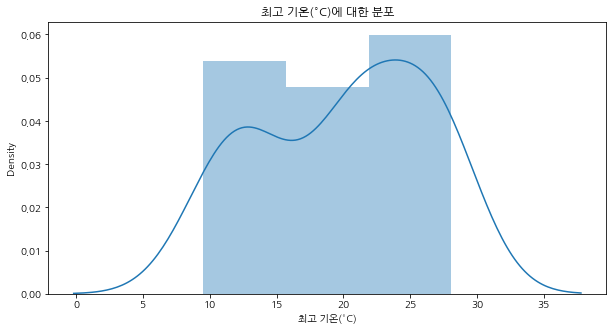

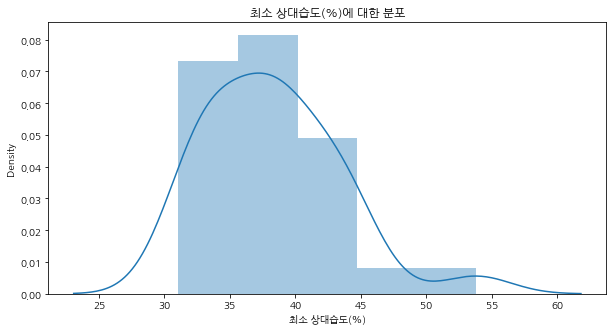

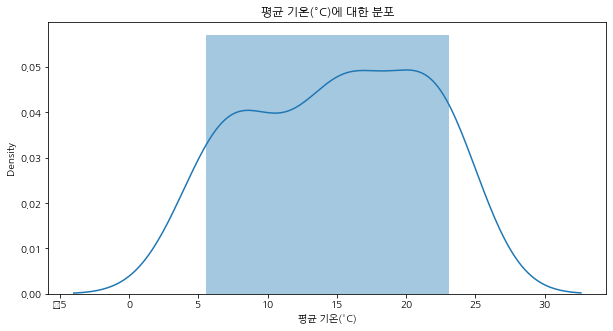

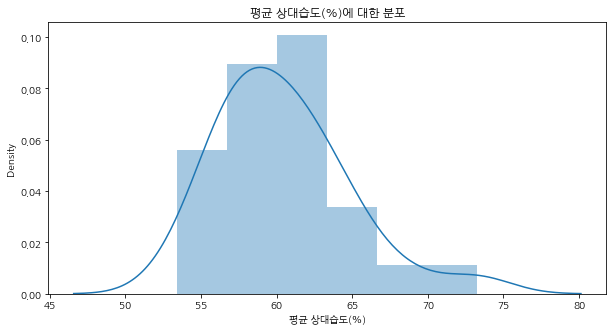

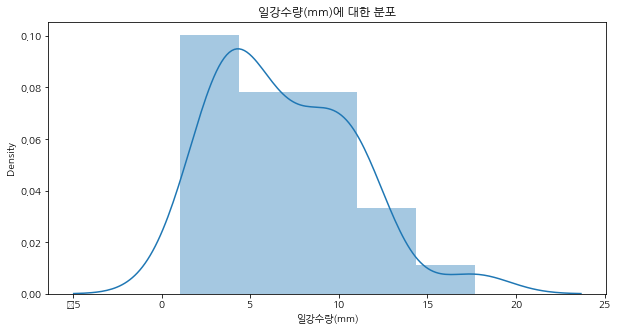

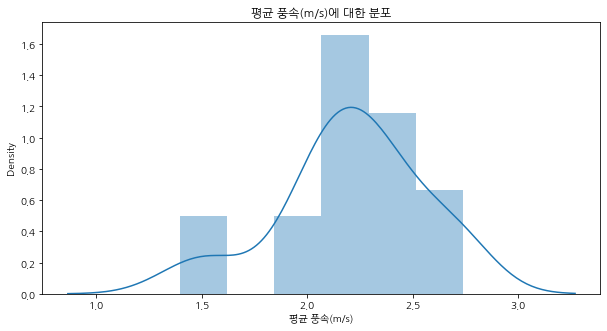

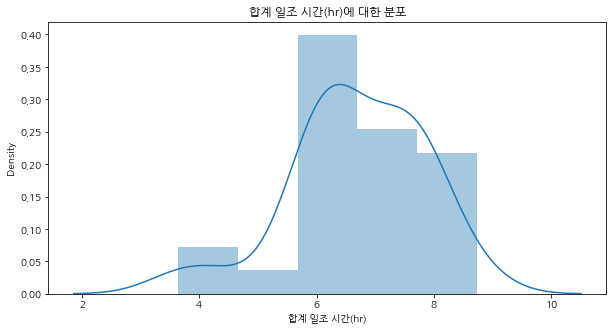

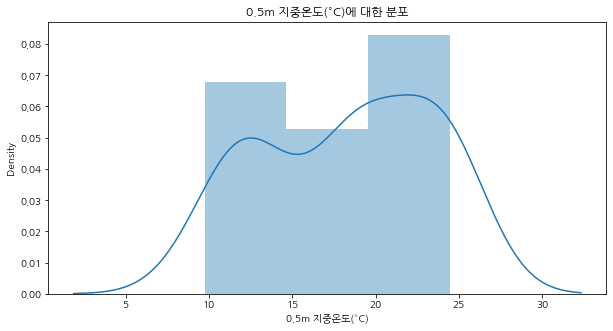

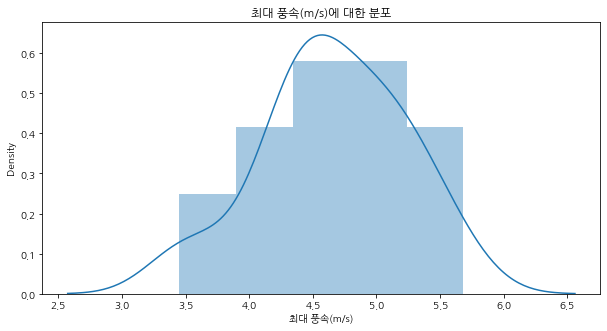

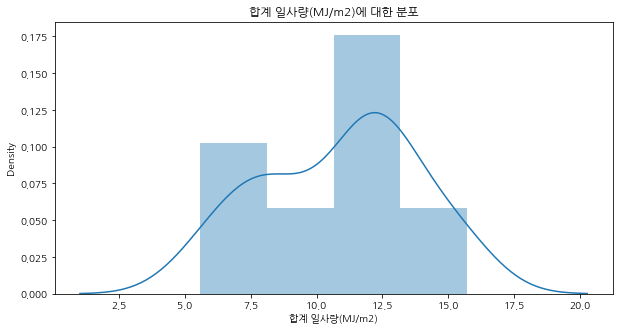

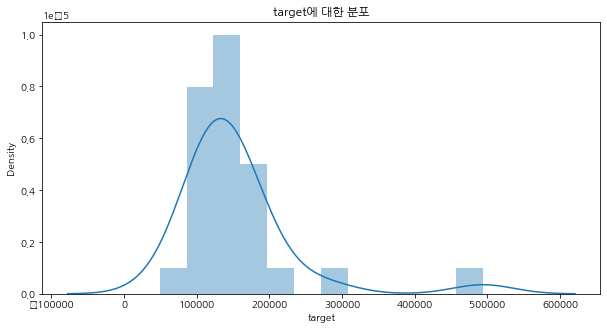

In [28]:
#덕수궁_가을 의 분포 확인
check_distribution(가을,['최고 기온(°C)', '최소 상대습도(%)', '평균 기온(°C)', '평균 상대습도(%)',
       '일강수량(mm)', '평균 풍속(m/s)', '합계 일조 시간(hr)', '0.5m 지중온도(°C)', '최대 풍속(m/s)',
       '합계 일사량(MJ/m2)', 'target'] )

In [29]:
# 덕수궁_가을 의 statsmodels확인
EDA(가을).check_statsmodels()

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.543
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     1.020
Date:                Sun, 18 Jul 2021   Prob (F-statistic):              0.492
Time:                        18:03:26   Log-Likelihood:                -332.52
No. Observations:                  27   AIC:                             695.0
Df Residuals:                      12   BIC:                             714.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.779e+05   3.71e+05      0.479

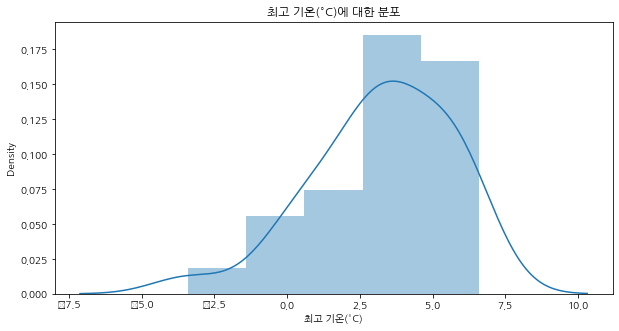

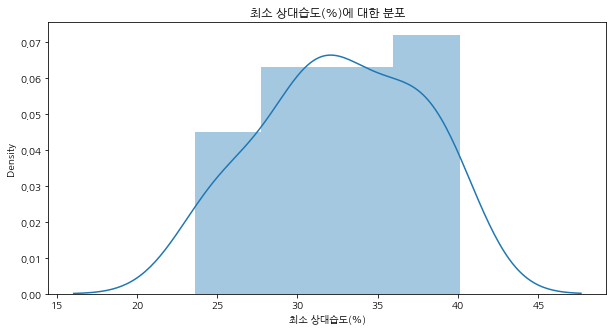

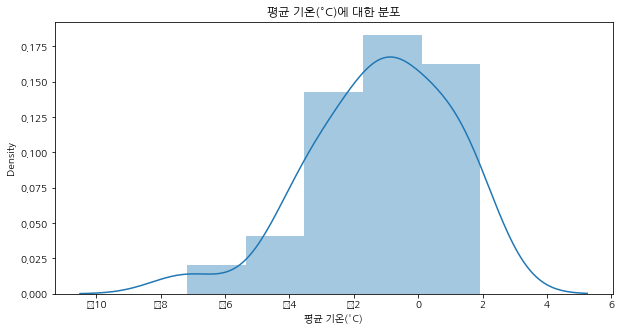

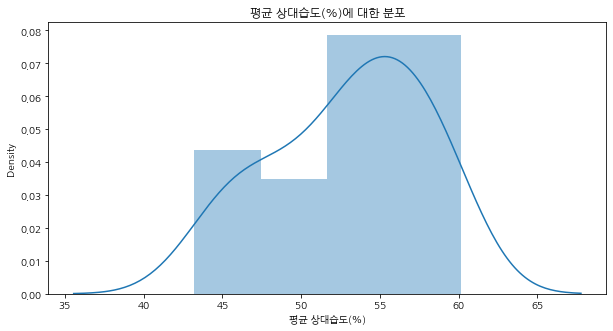

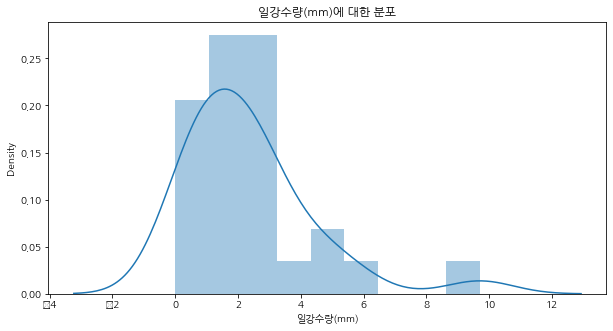

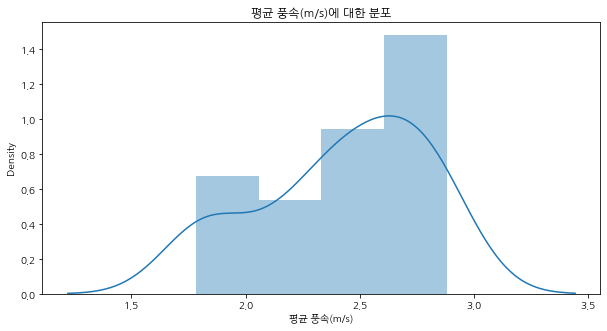

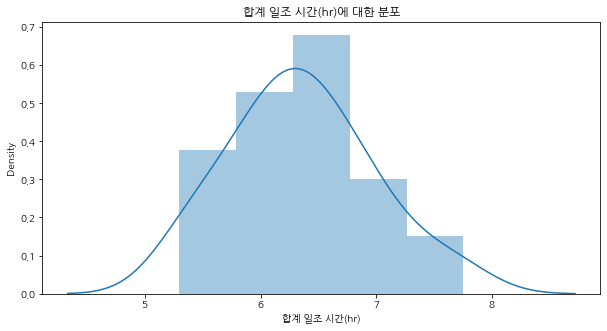

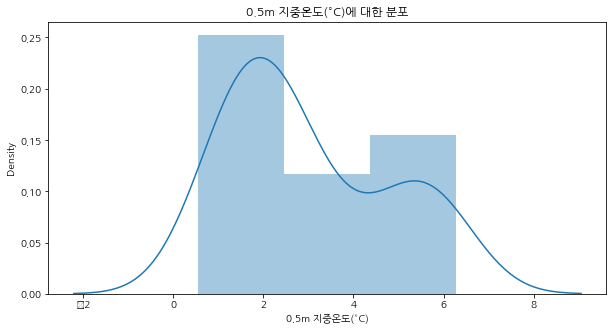

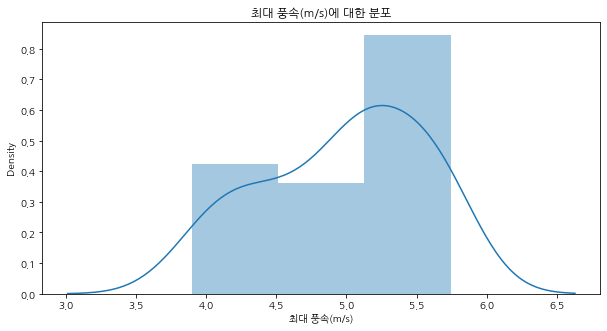

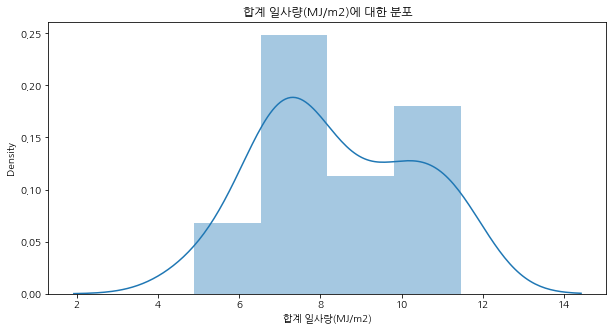

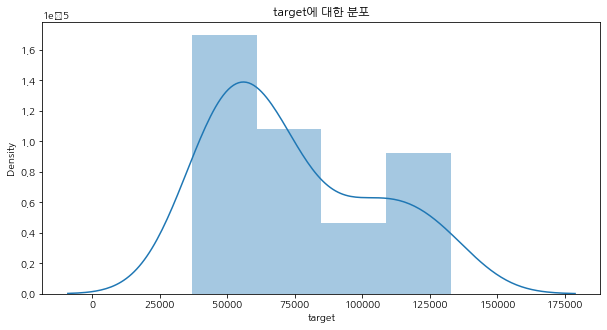

In [30]:
# 덕수궁_겨울 의 분포확인
check_distribution(겨울,['최고 기온(°C)', '최소 상대습도(%)', '평균 기온(°C)', '평균 상대습도(%)',
       '일강수량(mm)', '평균 풍속(m/s)', '합계 일조 시간(hr)', '0.5m 지중온도(°C)', '최대 풍속(m/s)',
       '합계 일사량(MJ/m2)', 'target'] )

In [31]:
# 덕수궁_겨울의 statsmodels확인
EDA(겨울).check_statsmodels()

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.629
Model:                            OLS   Adj. R-squared:                  0.397
Method:                 Least Squares   F-statistic:                     2.712
Date:                Sun, 18 Jul 2021   Prob (F-statistic):             0.0366
Time:                        18:03:39   Log-Likelihood:                -302.34
No. Observations:                  27   AIC:                             626.7
Df Residuals:                      16   BIC:                             640.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
최고 기온(°C)     -1.818e+04   1.81e+04     -1.002

In [32]:
EDA(df).check_statsmodels()

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.497
Model:                            OLS   Adj. R-squared:                  0.402
Method:                 Least Squares   F-statistic:                     5.223
Date:                Sun, 18 Jul 2021   Prob (F-statistic):           8.41e-08
Time:                        18:03:46   Log-Likelihood:                -1302.7
No. Observations:                 108   AIC:                             2641.
Df Residuals:                      90   BIC:                             2690.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.035e+05   8.55e+04      1.211

현재 
- 계절별로 나눠도 정규분포 어느정도 따르려고 하지만 잘 안따름
- statsmodel을 확인해 보면 모델에 적합하지 않은것 같음

향후 계획 
- 지금 계절데이터는 month데이터를 binning 한 작업이라고 볼 수있음
- month데이터를 사용하고 계절데이터 삭제 예정
- 타겟 log화 예정
- feature들 scaling 예정

# MODELING


step1) 전처리가 완료된 데이터 프레임을 받아서 모델을 돌리는 클래스에 접속한 뒤, 예측값을 받습니다.

- /content/drive/MyDrive/Proj_WT/DataSets/박정열/ 
이라는 path에 있는 관광지의 데이터를 모두 가져와서 dict 형태로 담아놓는다.

~~ETL, EDA, MODEL의 전 과정이 정리되면, /content/drive/MyDrive/Proj_WT/DataSets/Seoul/이란 path로 통합할 예정~~

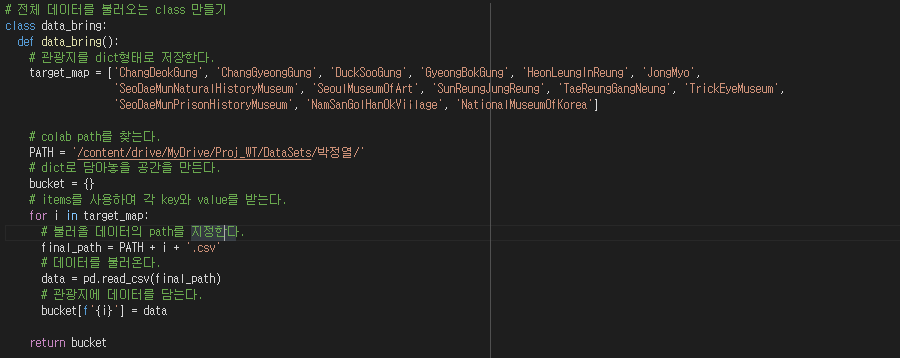

- 하나의 관광지 데이터가 들어오면 2017년 12월의 이전의 데이터를 train
- 2017년 12월 이후의 데이터를 test로 놓고 분석을 진행할 예정이다.
- 최고기온과 평균기온을 더미화 해주었기 때문에 다중 공선성을 방지하고자 기온에 대한 데이터를 제거해 줘야 했다.
- 경복궁의 데이터는 최고기온이 없었기 때문에 try except구문을 사용하여 기온 데이터를 제거해주고 X_train, X_test, y_train, y_test를 나눠주는 class를 만들었다.

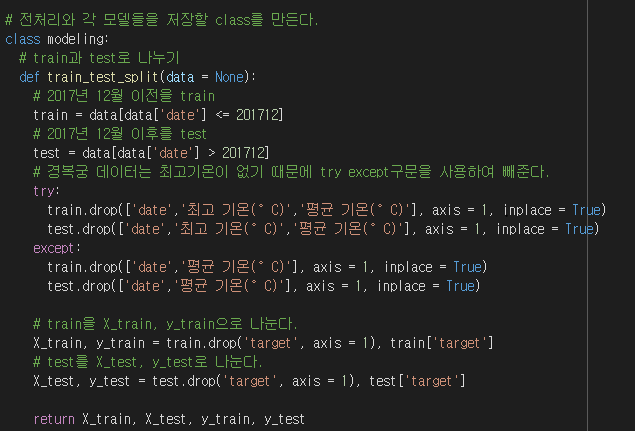

- 전체의 데이터를 돌려보기 위해서 class_all_model이라는 class를 구성했다.
- models에서는 각 모델을 한번씩 돌리고 그 모델을 쉽게 구별하기 위해서 dict형태로 쌓아놨다.
- 그것을 가지고 각 모델을 돌리기 위한 run이라는 함수를 실행하려 했고 위의 dict를 불러와서 final,_rmse, model_score, model_store라는 공간을 만들어주고
- dict형태의 모델들을 돌려서 final_rmse, model_score, model_store에 저장해준다.

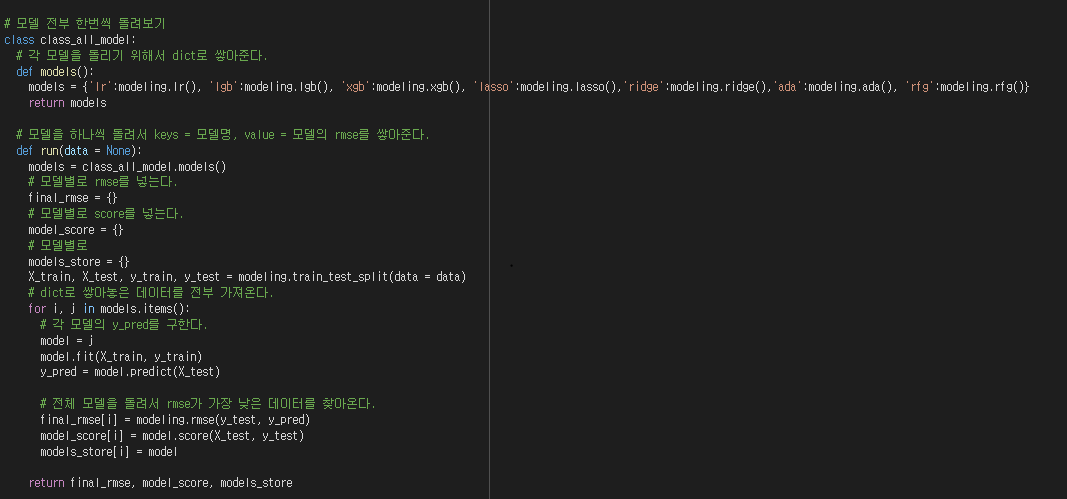

- 각 관광지별로 데이터프레임을 만들어 보기 편하게 바꾼다.

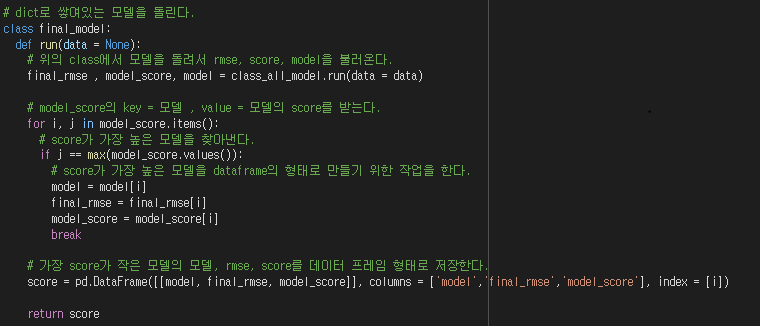

- index는 관광지 그리고 model, model_rmse, model_score의 데이터를 불러온다.

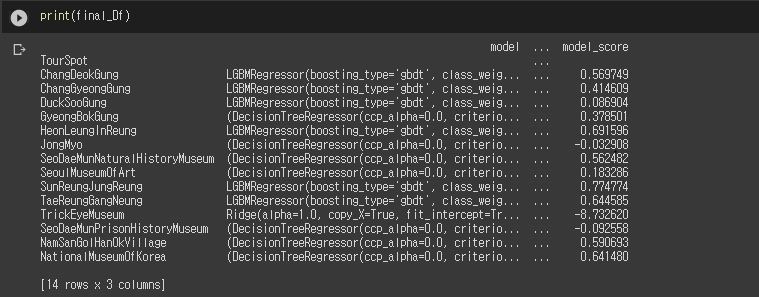

# 시각화 및 결론 도출 후 여행지 추천

아직 담당자 미정

step2) 결론 도출을 위한 광지 추천 방식 가설 검증

관광 추천지수 가설 후보

1) 가설 1: 

-----
타겟 분포의 75%기준을 잡고 

$ 추천지수 = \frac{실제값}{75\% 값} $

```
df['추천지수'] = df[tour].apply(lambda x : x/df[tour].quantile(0.75))
```

<small>@**김선홍** 담당</small>

2) 가설 2: 

-----

각 기후 칼럼 증분 값
* x1= 각 기후 칼럼의 총 평균 값
* x2= 해당 날짜의 기후 칼럼
* y1= 관광지 관광객 총 평균
* y2= 인공지능이 예측한 시점 관광지 관광객 수
* 기후 칼럼 증분 값 = ((y2-y1)/(y2+y1))/((x2-x1)/(x2+x1))


$추천지수= \frac{각 기후 칼럼의 증분값의 합}{해당 관광지데이터 프레임의 기후 칼럼의 총 개수}$


```
class Input:
    def tour_index(x1,x2,y1,y2):
        e=((y2-y1)/(y2+y1))/((x2-x1)/(x2+x1))
        e=pd.DataFrame(e, columns=['편차'])
        return e
    def output_index(y1,y2):
        a1=GyeongBokGung['총평균 기온(°C)'] # 2011-2019 총 평균 기온
        a2=GyeongBokGung['평균 기온(°C)'] # 오늘 평균 기온
        a=Input.tour_index(a1,a2,y1,y2)
        ########################################  # 이런 식으로 총 18개의 칼럼에 대한
        # .....................................#  # 증분 값을 구합니다.
        ########################################
        r1=GyeongBokGung[ '총평균 합계 일사량(MJ/m2)'] # 2011-2019 총 평균 합계 일사량
        r2=GyeongBokGung['합계 일사량(MJ/m2)'] # 오늘 합계 일사량 
        r=Input.tour_index(r1,r2,y1,y2)
        s=(a+b+c+d+e+f+g+h+i+j+k+l+m+n+o+p+q+r)/18 
        # 마지막으로 18개 기후 칼럼의 증분값을 전부 더한 후, 칼럼의 갯수로 나누어줍니다.
        return s
```



<small>@**윤요섭** 담당</small>

관광추천지수를 관광지별로 구한 뒤, 서로 비교하여 Rank 구하여, 이를 바탕으로 관광지를 추천

step3) 마지막으로 위의 2개의 클래스에 접속해서 받은 데이터 프레임을 가지고, 추천 시각화 서비스를 구현합니다.